In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import os
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from skimage import io
import matplotlib.pyplot as plt

In [78]:
# Hyperparameters
IN_CHANNEL = 3
NUM_CLASSES = 5
# LEARNING_RATE= 1e-3
BATCH_SIZE = 10 # can be changed but is just small for run time purposes
# NUM_EPOCHS = 1

class Aptos(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)  # some thousand images

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0] + '.png')
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)), # find out how to crop without changing aspect ratio
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2),
    #transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
])

# need to read on data augmentation

In [79]:
# Load data
dataset = Aptos(
    csv_file ='/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection/train.csv', # this dataset was only supposed to be train images yeah?
    root_dir ='/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection/train_images',
    transform=transform
)

train_set = dataset # don't need to split dataset

train_loader = DataLoader(dataset = train_set, batch_size = BATCH_SIZE, shuffle = True)

# Check if the DataLoader works correctly by getting a batch of data
a = next(iter(train_loader))
print(a[0].size(), a[1].size())

torch.Size([10, 3, 224, 224]) torch.Size([10])


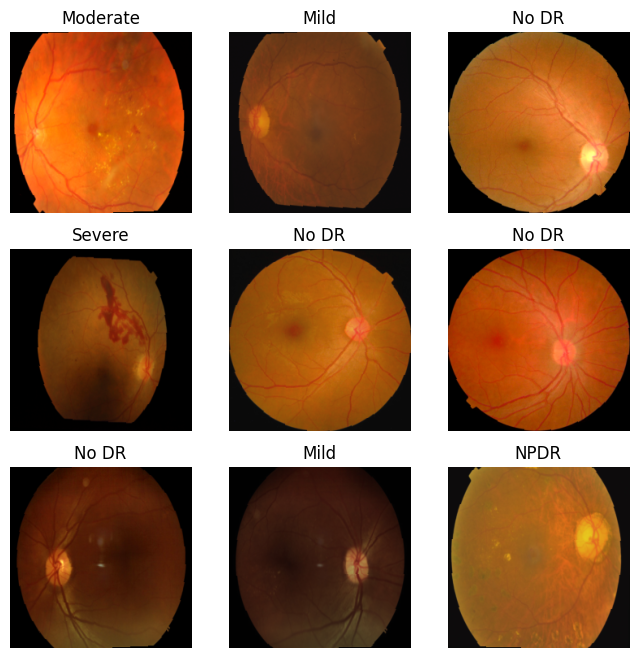

In [80]:
labels_map = {
    0: "No DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "NPDR",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    if torch.is_tensor(label): # had an error so converted tensor to plain int
      label = label.item()
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()

# show images with labels

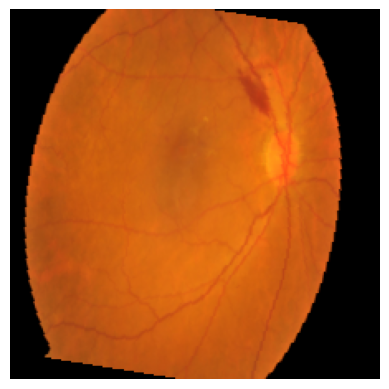

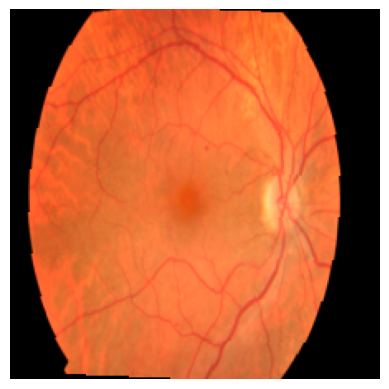

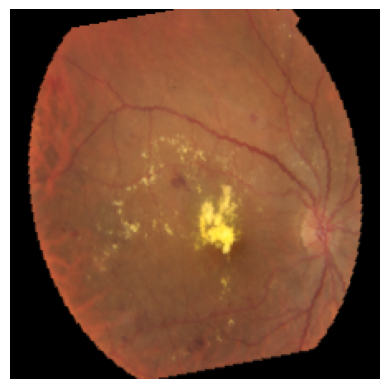

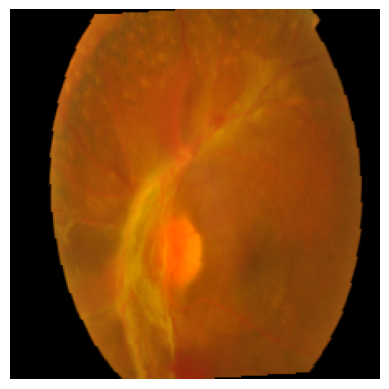

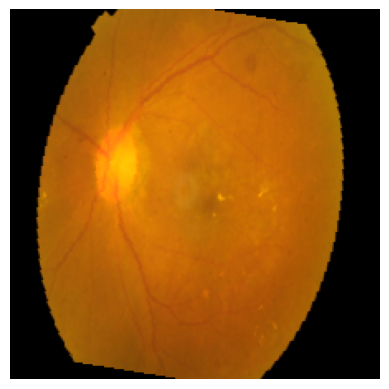

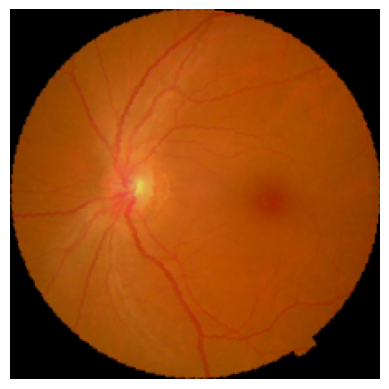

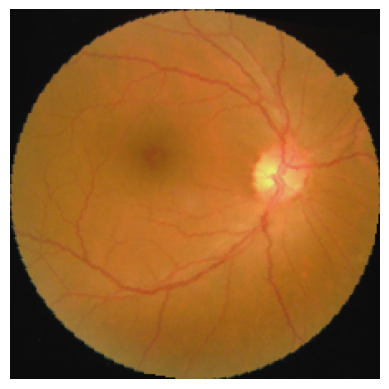

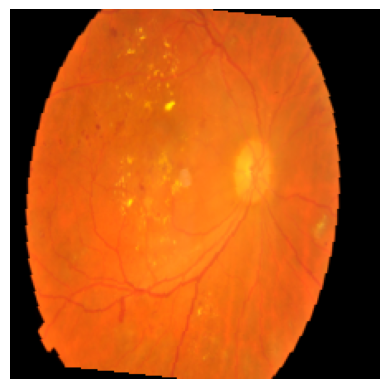

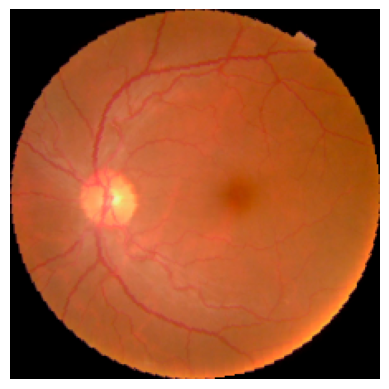

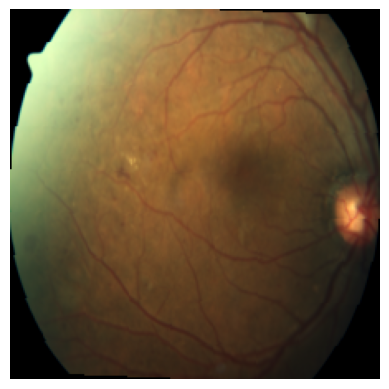

In [81]:
for i in range(BATCH_SIZE):
  plt.figure()
  plt.imshow(a[0][i].permute(1,2,0))
  plt.axis('off')
  plt.imshow

# for running each image individually